<a href="https://colab.research.google.com/github/udayzee05/Computer-Vision-and-OpenCV/blob/main/Face_Recognition_using_Local_binary_pattern_histogram_(LBPH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data from zip file and extract data
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file = path, mode= 'r')
zip_object.extractall('./')
zip_object.close()

Preprocess Images


In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject01.noglasses.gif', 'subject10.glasses.gif', 'subject07.surprised.gif', 'subject05.centerlight.gif', 'subject01.normal.gif', 'subject09.noglasses.gif', 'subject09.wink.gif', 'subject10.surprised.gif', 'subject04.centerlight.gif', 'subject05.sad.gif', 'subject01.wink.gif', 'subject04.normal.gif', 'subject01.glasses.gif', 'subject05.leftlight.gif', 'subject13.noglasses.gif', 'subject10.normal.gif', 'subject09.sleepy.gif', 'subject03.rightlight.gif', 'subject14.happy.gif', 'subject02.wink.gif', 'subject05.happy.gif', 'subject04.happy.gif', 'subject13.normal.gif', 'subject06.wink.gif', 'subject05.noglasses.gif', 'subject12.wink.gif', 'subject07.rightlight.gif', 'subject10.noglasses.gif', 'subject03.normal.gif', 'subject10.rightlight.gif', 'subject11.wink.gif', 'subject13.centerlight.gif', 'subject08.sleepy.gif', 'subject10.sleepy.gif', 'subject10.wink.gif', 'subject15.glasses.gif', 'subject04.sleepy.gif', 'subject12.surprised.gif', 'subject11.surprised.gif', 'subject11.leftlight.gi

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]

  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')#L means single channel image (grayscale)/ convert color to grayscale
    image_np = np.array(image,'uint8') # convert image into numpy array
    id = int(os.path.split(path)[1].split('.')[0].replace('subject','')) # get the id of the image  from path
    ids.append(id)
    faces.append(image_np)
  return np.array(ids),faces




In [ ]:
 ids, faces = get_image_data()

Training LBPH classifier


Training parameter for LBPH
1.Radius = 1 (default)
2.neighbors : 8
3.grid_x,grid_y -no of cells vertically and horizontally (8,8) i.e 64 histograms will be there

4.threshold

In [ ]:

lbph_classfier = cv2.face.LBPHFaceRecognizer_create(radius=4,neighbors = 14,grid_x =10,grid_y=10)
lbph_classfier.train(faces,ids)
lbph_classfier.write('lbph_classifier.yml')

Recognizing faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
test_image = '/content/yalefaces/test/subject03.glasses.gif'
image = Image.open(test_image).convert('L')
image_np = np.array(image,'uint8')

prediction = lbph_face_classifier.predict(image_np)
print(prediction)

(3, 74.75140639960365)


In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
print(expected_output)

3


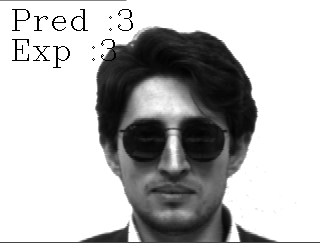

In [ ]:
cv2.putText(image_np, 'Pred :' +str(prediction[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0))
cv2.putText(image_np, 'Exp :' +str(expected_output),(10,60),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0))

cv2_imshow(image_np)

Evaluating the face classifier

In [ ]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []

for path in paths:
  image = Image.open(path).convert("L")
  image_np = np.array(image,'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.7

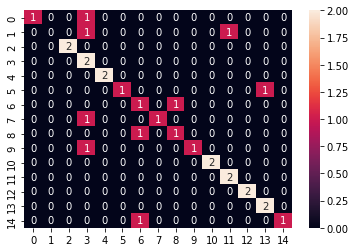

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(expected_outputs,predictions),annot=True)